# Popertee Data Challenge

## Objective
The objective of this task is to examine a set of tweets and determine their subject as well as the user sentiment behind that subject. To do this I will be mainly using the Python library TextBlob which provides a simple API for natural language processing tasks. 

In [301]:
import numpy as np 
import pandas as pd
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from textblob import TextBlob
from collections import Counter
import string
import re
import matplotlib.pyplot as plt
import emoji

# Taking arbitrary sample from the full dataset.
data = pd.read_csv('popertee.csv', nrows=4198) 

# We are supplied with 6 features but are concerned only with the tweet text
tweets = data['extended_text'].values


## Preprocessing

In [302]:
# Defining a function that will help us preprocess the data
def remove(tweet, removal_list):
    tweet = str(tweet)
    for item in removal_list:
        tweet = tweet.replace(item, ' ')
    return tweet


# Removing URLs
noURL = [] 
for tweet in tweets:
    t = re.sub(r"http\S+", "", str(tweet))
    noURL.append(t)

tweets = noURL

# Removing emojis
emoji_list = emoji.UNICODE_EMOJI

emoji = []

for item in emoji_list:
    emoji.append(item[0])
    
def remove(tweet, removal_list):
    tweet = str(tweet)
    for item in removal_list:
        tweet = tweet.replace(item, ' ')
    return tweet

newtweets = [remove(tweet, emoji) for tweet in tweets]
tweets = newtweets

# Removing digits
digits = [str(i) for i in range(10)]
newtweets = [remove(tweet, digits) for tweet in tweets]
tweets = newtweets


# Removing stop words
stop_words = stopwords.words('english')
newtweets = [] 
for tweet in tweets:
    tokens = word_tokenize(tweet)
    filtered_sentence = [] 
    for w in tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    newtweets.append(filtered_sentence)

newtweets = [[' '.join(i)] for i in newtweets]
tweets = newtweets


# Removing punctuation
newtweets = [] 
punc = list(string.punctuation)
newtweets = [remove(tweet, punc) for tweet in tweets]
tweets = newtweets


## Sentiment Analysis

In [303]:
ratings = []
subjects = []


for tweet in tweets:  
    blob = TextBlob(str(tweet)) 
    
    # Classifying tweets as positive, negative or neutral
    if blob.sentiment[0] > 0:   
        ratings.append("Positive")    
        
    elif blob.sentiment[0] < 0:       
        ratings.append("Negative") 
        
    else:       
        ratings.append("Neutral")
    
    # Extracting subjects of tweets
    nounphrases = []    
    for nounp in blob.noun_phrases:
        nounphrases.append(nounp)
    
    subjects.append(nounphrases)
        

all_subjects = []
all_ratings = []

for i in range(len(subjects)):   
    for item in subjects[i]:
        all_subjects.append(item)
        all_ratings.append(rating[i])

counts = Counter(all_subjects)

Let's examine the distribution of positive tweets to negative tweets.

Number of positive tweets: 2770
Number of negative tweets: 722
Number of neutral tweets: 706


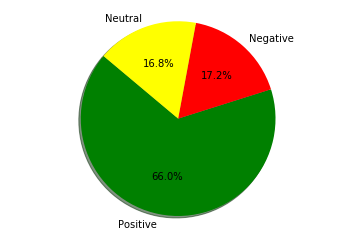

In [304]:
print("Number of positive tweets: " + str(ratings.count("Positive")))
print("Number of negative tweets: " + str(ratings.count("Negative")))
print("Number of neutral tweets: " + str(ratings.count("Neutral")))

labels = 'Positive', 'Negative', 'Neutral'
sizes = [ratings.count("Positive"), ratings.count("Negative"), ratings.count("Neutral")]
colours = ['green', 'red', 'yellow']

plt.pie(sizes, labels=labels, colors=colours,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

Let's also take a look at the most commonly discussed subjects.



The most commonly discussed subjects and their frequencies are: 

SUBJECT       COUNT
london        212        
n t           136        
july          107        
kingdom       74         
uk            69         
wimbledon     65         
thank         61         
brexit        57         
thanks        49         
have          47         
eu            44         
england       40         
u200d ️       38         
please        37         
well          34         


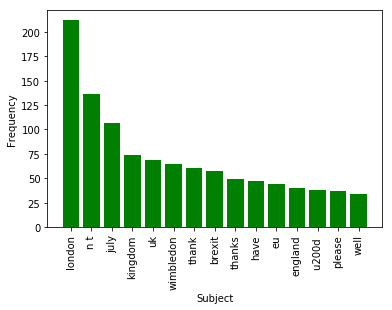

In [305]:
print("\n")
print("The most commonly discussed subjects and their frequencies are: \n")

print("SUBJECT       COUNT")
for e1,e2 in counts.most_common(15):
    print("{:<14}{:<11}".format(e1,e2))
    

x = []
y = []
for item in counts.most_common(15):
    x.append(item[0])
    y.append(item[1])

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='green')
plt.xlabel("Subject")
plt.ylabel("Frequency")

plt.xticks(x_pos, x, rotation='vertical')


plt.show()


As we can see, not all of these subjects provide useful information. We will remove items such as 'n t' or 'thank'. Apart from these, we can see that subjects such as "uk" and "brexit" are popular topics of discussion, as we would expect.

In [306]:
index = [1, 6, 8, 9, 12, 13, 14]
common_subjects = counts.most_common(15)

for i in sorted(index, reverse=True):
    del common_subjects[i]


Finally, we will review the overall sentiment behind these subjects.

Subject: london
Positive tweets: 130
Negative tweets: 45
Neutral tweets: 37




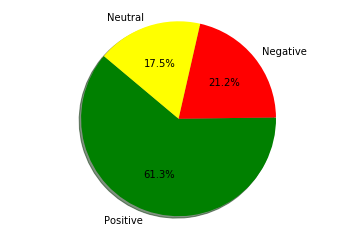



Subject: july
Positive tweets: 70
Negative tweets: 18
Neutral tweets: 19




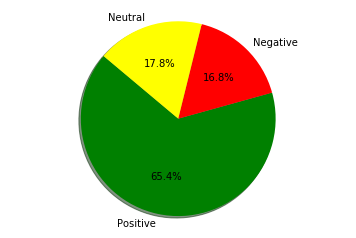



Subject: kingdom
Positive tweets: 54
Negative tweets: 7
Neutral tweets: 13




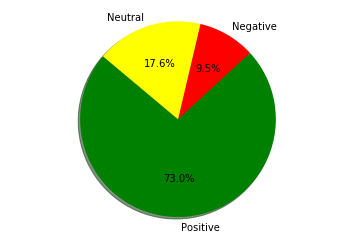



Subject: uk
Positive tweets: 40
Negative tweets: 16
Neutral tweets: 13




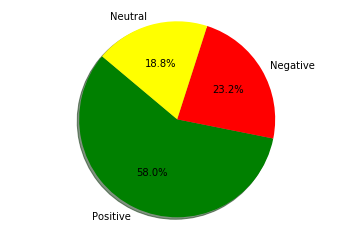



Subject: wimbledon
Positive tweets: 41
Negative tweets: 11
Neutral tweets: 13




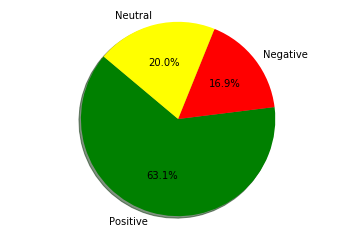



Subject: brexit
Positive tweets: 40
Negative tweets: 5
Neutral tweets: 12




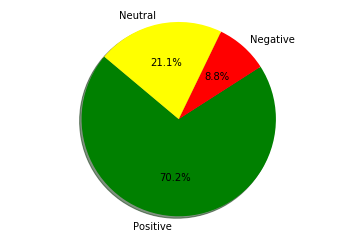



Subject: eu
Positive tweets: 30
Negative tweets: 9
Neutral tweets: 5




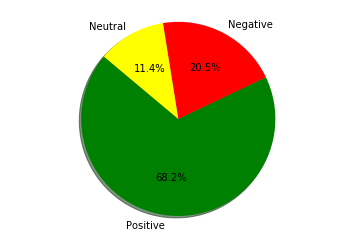



Subject: england
Positive tweets: 20
Negative tweets: 9
Neutral tweets: 11




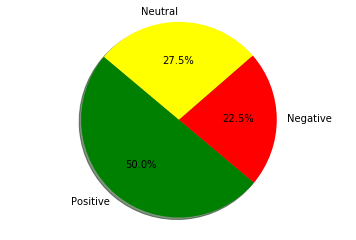

In [307]:
for item in common_subjects:
    indices = []
    sentiments = []
    indices = [i for i, x in enumerate(all_subjects) if x == item[0]]
    sentiments = [all_ratings[i] for i in indices]
    print("Subject: " + item[0])
    print("Positive tweets: " + str(sentiments.count("Positive")))
    print("Negative tweets: " + str(sentiments.count("Negative")))
    print("Neutral tweets: " + str(sentiments.count("Neutral")))
    print("\n")
    
    sizes = [sentiments.count("Positive"), sentiments.count("Negative"), sentiments.count("Neutral")]
    colours = ['green', 'red', 'yellow']

    plt.pie(sizes, labels=labels, colors=colours,autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
    
    print("\n")
    

## Discussion of Error

Although this approach is useful, it still has a lot of room for shortcomings. For example, tweets that contain numbers in place of letters like this:

PPEMIER RAD10 HAVE STARTED A PRAYER CAMPAIGN  'PEACE 0N 0UR STREETS-1 KN0W PRAYER GETS RESU1TS S0 I'M G0ING T0 1EAVE MY P0STC0DE AT   PEACE 0N 0UR STREETS,0RG,C0M 

emerge like this after preprocessing:

In [308]:
print(tweets[8])

  PPEMIER RAD HAVE STARTED A PRAYER CAMPAIGN  PEACE N UR STREETS  KN W PRAYER GETS RESU TS S I  M G ING T EAVE MY P STC DE AT PEACE N UR STREETS   RG   C M     


This means that there is less information available for estimating the sentiment of the tweet. 

Of course, even in the case that we have a 'perfect' tweet, the sentiment classifer is not perfect. 

If we look at the tweets below and the rating given to them by the classifier, we can see that there are many instances where the tweet is classified correctly but also some examples where the rating is wrong. 

In [309]:
raw_tweets = data['extended_text'].values

for i in range(len(raw_tweets)):
    print(raw_tweets[i])
    print("\n")
    print("This tweet is " + ratings[i])
    print("\n")
    print("----------")
    print("\n")
    

Thanks @ProWrestlingEVE for a fun weekend in the UK! Every time I visit I get to see some of the most talented women in the world kill it! 

See you again soon 💕 https://t.co/DtLclNTjWh


This tweet is Positive


----------


01:00 BST: temperature 14.6°C, humidity 75%, wind WNW 1.0 mph ave, 4.5 mph gust, rain 0.0 mm/hr, pressure 1018.6 hPa rising slowly https://t.co/XRWO6wsYww


This tweet is Negative


----------


The smiles only mean good things. .
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
#happiness #smiles #goodvibes #loveit #festival #london #life #eswaymedia #nextlevel #myway #instapicoftheday #live #summer #sunday #sunshine… https://t.co/wk1L08AXUe


This tweet is Positive


----------


On this day in 1916 the fiest and bloodiest day on the #Somme British forces suffered 57,470 casualties, including 19,240 fatalities. They gained just three square miles of territory. 😔 https://t.co/0ZMO3oA0Lk


This tweet is Neutral


----------


Wrestle Queendom is my favourite event of the year, not o



This tweet is Positive


----------


I bring you sunrise on the Monday Morning. Be encouraged whatever you have lined up. Be inspired and most importantly, be yourself 😍☀️😊#MondayMotivation #MondayMorning #mondaythoughts https://t.co/qxK74Th3QT


This tweet is Positive


----------


@txalicia1 @premierleague The range of merchandising choice available (and the queues to buy it inside and outside the stadium) and the options for food and drink.


This tweet is Positive


----------


#TeamModelzentz Presentz
Model @brittanyrennerr 
Check Out The Link 
https://t.co/80jzuf8LpE

To Be Feature DM Me Or Leave A Comment.… https://t.co/XRxVg9hXH0


This tweet is Neutral


----------


@realDonaldTrump It’s amazing how You’ve broken collective patterns of fear and anxiety... by walking into N Korea and meet Kim.👏👏👏😀
This is an awesome example of Greatness...set by a Great Leader ..Much Love Don and to all Your near and dear ones.🤗


This tweet is Positive


----------


Zenhaus Summer Sale 

@bigdropbrewco loving your whole range of tasty crafty alcohol free beers....well done all...hope my favourite haunts look into stocking your products @Princesgolfclub @OrpLibClub #fun #enjoy #drinkanddrive


This tweet is Positive


----------


UAE debuts the world's largest solar power project, Noor Abu Dhabi. 3.2m panels provide enough power for 90,000 people, &amp; will lower CO2 emissions by 1 million metric tonnes. That's the equivalent of pulling 200,000 cars off the roads https://t.co/tBOFTInwZr #sustainable future


This tweet is Neutral


----------


Interested in Public Speaking? Join one of my FREE London events. 

Thank you https://t.co/pzV7z3DOUk for a great and affordable space bang in the middle of London. 

@F2Startup… https://t.co/J5QJNpSON3


This tweet is Positive


----------


@afshah_deen @NCETM @MathsHubs @GWRHelp @epatman @ELambertNCETM @ThinkingMaths Looking forward to it! So pleased you are coming to share your experience with the new specialists. Thank you

@GMB re Jihadi Jack.  I don't care about him. I sympathise with the parents but they have to accept he was a traitor.  Meanwhile Nazanin has done nothing wrong and she does NEED to come home!


This tweet is Negative


----------


To Devon for a week with possible poor internet connection so I'll be quiet for the next seven days. Maybe...  #holidays #Devon #familylife #writerslife https://t.co/qZ4wmwdqgy https://t.co/3dodCOLzZ3


This tweet is Negative


----------


@revpeterlaws @patriciavolk And I can’t see the second from the left very well but the pointing automatically makes me think Invasion of the Bodysnatchers...


This tweet is Neutral


----------


IM SPEAKING ON THIS PANEL THIS THURSDAY! TICKETS ARE FREE - come here me chat shit about a brown punk, try to think of quick responses whilst covering up imposter syndrome with an overkill of confidence and humour ❤️


This tweet is Positive


----------


@KSAAcomm Was given this as a gift yesterday. John Keats, Amy Lowell, 2nd


Let’s see on that one - still cannot see Turkey staying on the F35 programme. But Trump effectively gave green light to every NATO member to buy S400s.


This tweet is Positive


----------


#Saturday 06th July  IMAGE will be #Closed  Until 10am #Monday 08th July #Pride2019 #ShopLocal #SupportLocal⁠ ⁠#FreeCollection #FreeDelivery #NorthLondon #N15 #N16 #N17 #N22 #N4 #LondonN15 #LondonN16 #LondonN17 #LondonN22 #LondonN4 #Tottenham https://t.co/7qBL2gKTmx


This tweet is Negative


----------


Delighted to have worked with @ACCANews on this thought provoking research. Great debate to be had on the future of the Finance function #ACCA #cfo #Finance


This tweet is Positive


----------


@ric__harvey @QuinnyPig I did the same 4 years ago...
Then went back to security ops role. Lol
SRE next...
I do miss spending time in architecture


This tweet is Positive


----------


@BradMorris83 @ThePansyBastard @BryceBealey @Nigel_Farage We are all humans, there is no hierarchy. Just be grateful



----------


#ifyouknowyouknow 2nd half, 3rd quarter.. Let's get it 😎 💪🏾
#getyours #loveyours #Blessings #fitfam #fitnessmodels #beastmode #workout #gymlife #liftheavy #fitlife #eatclean #trainmean #staylean #biceps #Triceps… https://t.co/OhqROppUHL


This tweet is Negative


----------


@Stu45912 @DavidEa61704055 If you mean Kay Burley. I have liked her since the Manchester prison riots. Now, I don’t like her, because she’s a leftie broadcaste, and a bully.


This tweet is Positive


----------


Yes we’re halfway through the year and you may be no closer to your goals than you were in January. However do not give up, don’t be discouraged as you always have today to start changing your… https://t.co/OwljfwQmp6


This tweet is Neutral


----------


Great opportunity here 👇 includes managing our @NMBiennial #composerfund &amp; #resonate &amp; working with our brilliant team


This tweet is Positive


----------


Sadly today Japan resumes whaling in its waters. Aside from tragic poi

This tweet is Negative


----------


European Forum of #LGBT #Christians is over. Very grateful for the interesting program and wonderful people! Thanks for the #hospitality of the English Hosts! @JayneOzanne @ChristiansLGBT @WielieElhorst https://t.co/w31EFeP2SH


This tweet is Positive


----------


@AndySco67625701 @DawnAstle9 @FA @PFA @JimWhite @xDaniwisemanx  We need to keep campaigning hard. I need permission from all the affected families and I will contact @PFA @thepfa Gordon Taylor is aware of my campaign and a combined force will highlight it even further. We need action ASAP


This tweet is Positive


----------


@LBRuT_Help Machine 5562 on Normansfield Ave, although it’s lovely and new, when I put my Richmond card in it says ‘Offline to server, pay with coins’ could you pop up and fix it please ? School run is awkward otherwise. Thanks 🙏


This tweet is Positive


----------


@JohnTAlcock1 @metpoliceuk I reported them, but looking at their timeline, they've been spoutin

This tweet is Negative


----------


Morning folks. Just a warning note. If you don’t want your timeline peppered with argument, don’t even make a comment on any post to do with bicycles and cars 🙄


This tweet is Neutral


----------


Asheaco hair butter is wonderful for all types of hair and can also be used as a curling cream or leave in conditioner 🌱🥥🌴🌺
#asheaco #skincare #beauty #naturalhair #naturalhairstyles #vegan #organic #natural… https://t.co/9E5DqM8BNV


This tweet is Positive


----------


#repost Original here》&gt;@sethleander "Candid shots" 
Taken on the way to a photo shoot in The City of Westminster, London UK 
#model #london #luggage #travel #style #fashion #catwalk #runway #street #luxury… https://t.co/OwgRuKCD8G


This tweet is Positive


----------


@lxthrdg This is just an example of a journey that I frequently make and the range of prices available. I don’t know what stations you’re travelling to/ from.


This tweet is Positive


----------


hadn’t seen the 


This tweet is Neutral


----------


@lyngardner @StagedoorLDN @edfringe Do you remember Chalk Farm with a young @TheThomasDennis ? He is back at the #EdFringe19 this year with @WirelessOp at #thepleasance You gave him some lovely #wise words at the time which he has remembered ever since 😍 https://t.co/1eS68m8mwb


This tweet is Positive


----------


@PetitShelly Aww ok..  I'm trying to get a choir to record a soundtrack and have my friends in video!! Looks like we will both have to mime!!! Better today only took 2 tweets to make u laugh!! Keep walking hun. Will keep in touch with progress x


This tweet is Positive


----------


We work with the finest #designers and #architects across #London to turn residential concepts into reality.
Photos are from a High-end renovation in #Marylebone.
https://t.co/kPhM1KRGMH
.
.
.
#Construction #Architecture #Interiordesign #Property #Residential #DesignandBuild #BIM https://t.co/rD1W7LX4jm


This tweet is Positive


----------


@lederroux @



This tweet is Positive


----------


This a an amazing event. Fantastic environment and incredible people giving up their time to nurture young ladies in codeing . If you have a girl who is intrested they will not be disapointed .Get you tickets quick as they go fast


This tweet is Positive


----------


@curleysteve89 @SurreyLife @timeandleisure @southeastNT @savebutterflies Yes, hopefully got them all - in all my time photographing I've never had so many - in the end my wife had to help me in the inaccessible places like my back - not nice


This tweet is Positive


----------


@1964suebar I’m with you Sue, have never been a fan of Wimbledon....but at least when it’s finished, you know the football season won’t be long! 😁x


This tweet is Negative


----------


Fight week for @neonsamuels pro debut coming this saturday at york hall. @wheyduk #teamsamuels #boxing @Goodwin_Boxing @ London, United Kingdom https://t.co/TXV2r6EIrF


This tweet is Neutral


----------


@mato66 @Pau

This tweet is Positive


----------


@BritishComedy Provided it is written by #BenElton and #RichardCurtis it will be a complete joy. Rather hoping to see the return of Mrs Miggins too #Blackadder


This tweet is Positive


----------


@PaulCha48475620 @felixstowebook It’s a lovely idea but can’t really give my agent extra work without her permission! And best for authors to query themselves to keep things fair!


This tweet is Positive


----------


Level up your BBQ game with a Texas BBQ class @londonbbqschool 🐮 🐷 🔥 Spaces available Aug 3rd &amp; 4th #hotlinks4life @ London Barbecue School https://t.co/C4sO9soAlX


This tweet is Neutral


----------


Gorgeous day soaking up the sun @communityldn with ranroop and @lizzie4burrough. To cap it all yesterday's burn is now glorious tan!...or just slightly less pasty than I was before ☀

#communityfestival… https://t.co/rFZAIPZR4k


This tweet is Positive


----------


@rosetalkssex @fanbaits @exposedx @_Charlie_rose @ColinLChapman @St

----------


🤩🤩🤩 Ilze + Andris 🤩🤩🤩
Well, this couple stole our hearts sometime ago. Never ending energy, laughter no matter what and those high heels - yes Ilze remember to brake those dancing shoes before the big day coming very, very soon @hitchedcouk
#londonengagement #hitched https://t.co/XKIQ2rmGYH


This tweet is Positive


----------


@sharpeangle @MrAndyMcCarron I can see their point, kind of. Even an alcoholic is unlikely to run up a credit card bill of thousands of pounds in a short time period, whereas a gambling addict, as we all know, is quite capable of doing just that chasing their losses backing one 'good thing' after another


This tweet is Positive


----------


Hey @buckinghamroyal any way a few Canadians can get inside closer to watch the changing of the guard on Canada Day??? 🇨🇦 https://t.co/PTX3i2nI5P


This tweet is Neutral


----------


Packing. One of my least favourite chores. I need to be filthy rich so I can own several properties in several countries, ea


----------


Sadiq Khan: Stop XXL London's eviction from their current venue - Sign the Petition! https://t.co/KleBxRXEZU via @UKChange #xxl #gay #pride #LondonPride


This tweet is Positive


----------


@shawnleekitfc Fight the fight your doing so well just getting out of bed in the morning, listen to your outside voice you give us your motivation your strength your lovely boy, get out in the sun like you tell us, sorry not very good with words or spelling lol as you can tell x


This tweet is Positive


----------


Here's an updated photo of the unit where everything is 20% off. If you love this Dragon T'Shirt, there's just one here and it's a 6-12 month size.

Available here at Natural for Baby 78 Balham High Road London SW12… https://t.co/3wk2KTCLpk


This tweet is Positive


----------


A few photos from the inaugural “Peer Pressure Supper Club” cooking a Moroccan feast for 14 people on the hottest day of the year so far....thank you to all who made it possible x @ Brixton ht



----------


What a magical day for @astrasharma to be making her @Wimbledon debut - with Centre Court as the backdrop! She’s on Court 14 now against 27th seed Sofia Kenin. #GoAussies https://t.co/rhCcDNawGe


This tweet is Positive


----------


@LindaThomasUK @DavidCrausby @BoltonLabour @UKLabour @GwynneMP @AndyBurnhamGM @YasminQureshiMP @LGA_Labour We will Vote for the Brexit Party....?❣️❣️


This tweet is Neutral


----------


@MikeRobbins19 @JamesMelville And Hitler at nuremburg or stalin in red square
Both of whom were SOCIALISTS you uneducated fool
Millions died because of the civil war between socialism in 1939/45
I can't quite see Farage catching up with them
More hypocritical scaremongering from the left
Idiot


This tweet is Positive


----------


Wow! I am pretty excited about doing 3 classes this week in one day as follows: cold reading, the repetition and I forget the 3rd as I'm so excited @The Actors Temple. https://t.co/DSNO7egCb7


This tweet is Positive


-------

This tweet is Positive


----------


@Soon2do @feebee79 @BillyDann1 @brexitparty_uk You see the thing is, leave or remain, the whole thing is way more complicated than that and should be more than just some jingoistic march of the Boomers. Led by duplicitous, self-serving millionaires.


This tweet is Negative


----------


Things found to be suspicious and worthy of extra special scrutiny in just the last 5 people:
* A small wheel of cheese
* A steak knife
* A bottle of facial water
* A pair of disposal contacts
All allowed to pass through after much consternation.


This tweet is Positive


----------


@Furotiza Mythical .... interesting ... so experience counts for naught?
As if we didn’t just see the same video.
As if I’ve not said they’re irrelevant to me and im indifferent for the most part.


This tweet is Neutral


----------


@BBCCarrie Heard the piece on the Snake your reaction made me Smile,and the Gentleman on the Sports I remember the Original Song thought that was a n

This tweet is Positive


----------


@SamF_H @RBKingston @Ian_C_Thomas @CllrLizGreen @RBKMayor Lovely to see this.  Well done.  I'm sorry I couldn't be there this morning but it's great to see the Pride Flag flying in Kingston.  🌈🌈🌈


This tweet is Positive


----------


Jeremy Hunt's heavily hearted speech saying just how far he is prepared to fuck an entire country to land a top job and keep his friends on side.


This tweet is Neutral


----------


“So, baby, girl, we don’t change. We take the gravel and the shell and we make a pearl. And we help other people to change so that they can see more kinds of beauty” @pink I love you and thank you for always being… https://t.co/Rr2El0IyIu


This tweet is Positive


----------


Meet #MLGNOVA YourNOVA finalist #13: Wen Ju Tseng 👋🏼 wenju.tseng’s jewellery collection subverts the uses of everyday objects to challenge how societal expectations are creating a worrying trend to commodify… https://t.co/M7UGjJhFay


This tweet is Negative


--

@MoneyObserver @RichardBeddard Thanks.  I think that formulaic systems are over promoted.  Past financial criteria tell you about the past.  What matters is the future.  Looking at the portfolio and AA, Centamin are of questionable quality IMO.  Screens can be useful but they are just a starting point IMO.


This tweet is Negative


----------


The @ACLU were prepared for Trump’s election - they knew which of his policies were unconstitutional and were placed to lead the resistance. Their campaign to help defend the human rights of immigrants to the US raised $24,000,000 in just one (!!) weekend #IoFCC https://t.co/Ij5aBE6pZ9


This tweet is Neutral


----------


And breathe...
...
...
...

#counsellor #London #Ilford #psychotherapist #lifecoach #onlinecounselling #flexiblecounselling
#itsgoodtotalk #anxietyrecovery #talkingtherapy #clarity #talkinghelps #purpose #therapy… https://t.co/d4VqmQK07H


This tweet is Neutral


----------


YAY! Our website is now live! 
Link in our bio to

----------


@tribazik Spacetime collapse EP now on Spotify! 
Featuring remixes by @snares @djsterlingmoss 
Go stream and add to playlists 😛😜🤪 
Also available as a ltd edition 12” vinyl from store while stocks last.
#12inchvinyl… https://t.co/ugxb6cVNJd


This tweet is Positive


----------


Message from Bexley Foodbank;

Currently Welling foodbank which is open on Sat afternoon from 1pm-3pm , is closed. We will let you know when re-opened. 

Since April, we have 2,400 people visit for assistance. cont..


This tweet is Negative


----------


For those churches who kindly regularly donate to us, our current shortages are:-
Meat
Fish
Long life milk
Long life fruit juice
Sugar
Pasta sauce
Coffee
Tinned fruit
Timers peas and sweetcorn
Rice pudding &amp; custard
Sponge puddings
Mash potato 
Shampoo &amp; toothpaste


This tweet is Negative


----------


Excited to share a wonderful video from tnrw  for my current single “ the last song “  really hope you guys like it and  share it ;). M

Looking at the hundreds of photos from World Pride breaks my heart because I can’t celebrate Pride with Han 😢 definitely making plans for next year!!! 🏳️‍🌈


This tweet is Neutral


----------


.@FIFAWWC - That's OK. @Wimbledon has started too! ☀️🎾☀️🎾☀️

Looking forward to the football returning tomorrow!  👍😁😁😁⚽👏👏👏

#SummerOfSport ☀️⚽🎾⚾ #FIFAWWC #DareToShine


This tweet is Positive


----------


Morgan and Littlejohn can find out why we don’t need to use the word ‘naughty’ anymore when teaching empathy and self-regulation. Just come along to Ashford District STLS training next year @ChildEkhuft @SebdaOrg @YoungMindsUK


This tweet is Negative


----------


Looking for Burnets part 2 - included New Forest Burnet and Slender Scotch Burnet in the Scottish Highlands on 26th/27th June 2019 seen with James Lowen and Will Soar.  #mothsmatter #teammoth @savebutterflies @JulieWilliamsBC @SueTownsend3 @JLowenWildlife https://t.co/rq0AXAJNpV https://t.co/oB7zlWRidr


This tweet is Positive




For example, the second tweet in the list only relays factual information but is classified as negative, possible due to the presence of the word "slowly".